# Feature Selection

Many models do not perform well on high-dimensional data. **The curse of dimensionality**

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

business_df = pd.read_csv("../Data/business_census_merged_dataset.csv")

business_df["Median_Income(dollars)"] = pd.to_numeric(business_df["Median_Income(dollars)"], errors='coerce')
business_df["Mean_Income(dollars)"] = pd.to_numeric(business_df["Mean_Income(dollars)"], errors='coerce')

def changeStatus(status):
    if status == 'AZ':
        return 1
    elif status == 'CA':
        return 2
    elif status == 'DE':
        return 3
    elif status == 'FL':
        return 4
    elif status == 'ID':
        return 5
    elif status == 'IL':
        return 6
    elif status == 'IN':
        return 7
    elif status == 'LA':
        return 8
    elif status == 'NJ':
        return 9
    elif status == 'NV':
        return 10
    elif status == 'PA':
        return 11
    else:
        return 12
# Along with replace() and map(), encode the state column into numbers.
business_df["State"] = business_df["State"].apply(changeStatus)

business_df = business_df.dropna()

In [16]:
X = business_df[['State', 'Review_Count', 'Restaurants_Delivery', 'Outdoor_Seating',
       'Accepts_CreditCards', 'Price_Range', 'Alcohol', 'Good_For_Kids',
       'Reservations', 'Restaurants_TakeOut', 'WiFi', 'Good_For_Groups',
       'Wheelchair_Accessible', 'Happy_Hour', 'Noise_Level',
       'Dietary_Restrictions',
                'Total_Estimate_Married-couple_Family_households',
                'Total_Estimate_Nonfamily_households',
                'Median_Income(dollars)', 
                 'Total_Estimate_Households_per_Zip', 
                 'Mean_Income(dollars)']]

# Filter Continous Features by Variation

In [17]:
X = business_df[['Review_Count', 'Total_Estimate_Married-couple_Family_households',
                'Total_Estimate_Nonfamily_households',
                'Median_Income(dollars)', 
                 'Total_Estimate_Households_per_Zip', 
                 'Mean_Income(dollars)']]

In [89]:
variation_data = sorted(zip(X.var(), X), reverse=True)
variation_df = pd.DataFrame(variation_data, columns = ['Score', 'Feature'])
variation_df

,Score,Feature
0,1.352586e+09,Mean_Income(dollars)
1,7.037151e+08,Median_Income(dollars)
2,3.160560e+07,Total_Estimate_Households_per_Zip
3,9.149255e+06,Total_Estimate_Married-couple_Family_households
4,7.755298e+06,Total_Estimate_Nonfamily_households
5,6.172889e+04,Review_Count


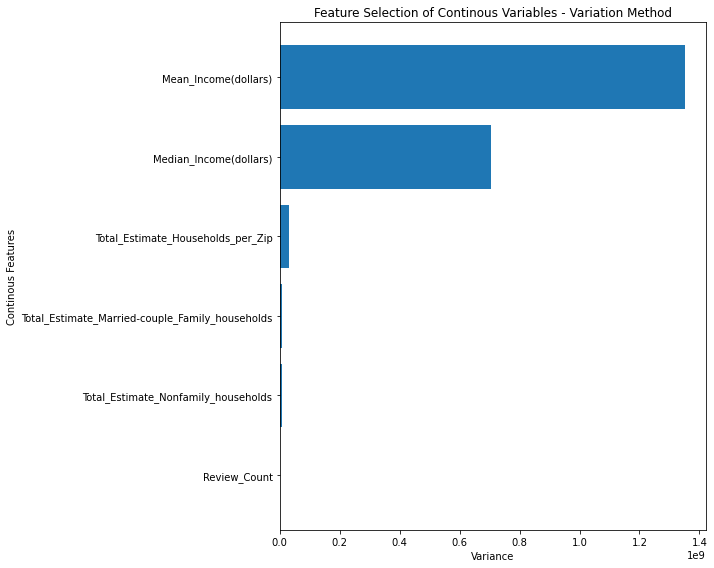

In [90]:
plt.rcParams["figure.figsize"] = (10,8)
plt.barh(variation_df['Feature'], variation_df['Score'])
plt.title("Feature Selection of Continous Variables - Variation Method")
plt.xlabel("Variance")
plt.ylabel("Continous Features")
plt.tight_layout()
plt.gca().invert_yaxis()

Restaurant Takeout and Dietary Restrictions

# Filter by Correlation
Checking for multicollinearity

In [76]:
X_y=business_df[['Stars_Rating', 'State', 'Review_Count', 'Restaurants_Delivery', 'Outdoor_Seating',
       'Accepts_CreditCards', 'Price_Range', 'Alcohol', 'Good_For_Kids',
       'Reservations', 'Restaurants_TakeOut', 'WiFi', 'Good_For_Groups',
       'Wheelchair_Accessible', 'Happy_Hour', 'Noise_Level',
       'Dietary_Restrictions',
                'Total_Estimate_Married-couple_Family_households',
       'Total_Estimate_Nonfamily_households',
                'Median_Income(dollars)', 'Total_Estimate_Households_per_Zip', 'Mean_Income(dollars)']]

In [34]:
import seaborn as sb

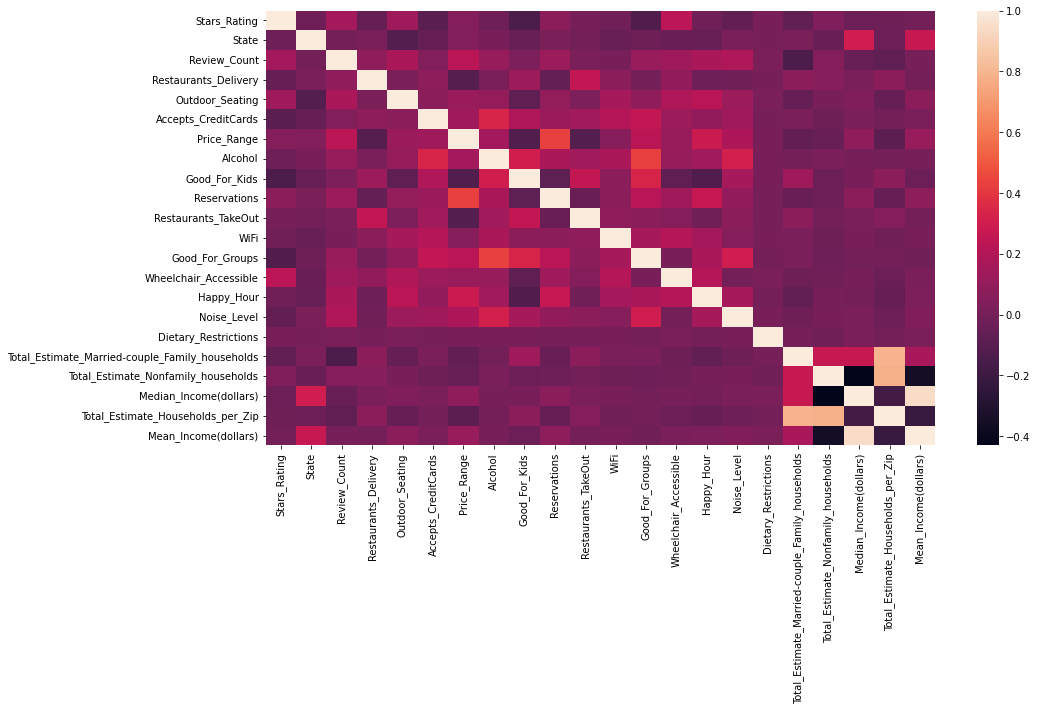

In [35]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sb.heatmap(X_y.corr(), ax=ax)
plt.show()

In [79]:
correlation_data = sorted(zip(abs(X_y.corr()["Stars_Rating"]), X_y), reverse=True)

In [80]:
corr_df = pd.DataFrame(correlation_data, columns =['Correlation_Score', 'Feature'])
corr_df

,Correlation_Score,Feature
0,1.000000,Stars_Rating
1,0.234588,Wheelchair_Accessible
2,0.150650,Review_Count
3,0.140206,Good_For_Kids
4,0.130741,Outdoor_Seating
5,0.128852,Good_For_Groups
6,0.093883,Accepts_CreditCards
7,0.068389,Total_Estimate_Married-couple_Family_households
8,0.067196,Reservations
9,0.066566,Noise_Level


In [81]:
corr_df.drop([0], inplace=True)
corr_df

,Correlation_Score,Feature
1,0.234588,Wheelchair_Accessible
2,0.150650,Review_Count
3,0.140206,Good_For_Kids
4,0.130741,Outdoor_Seating
5,0.128852,Good_For_Groups
6,0.093883,Accepts_CreditCards
7,0.068389,Total_Estimate_Married-couple_Family_households
8,0.067196,Reservations
9,0.066566,Noise_Level
10,0.051258,Restaurants_Delivery


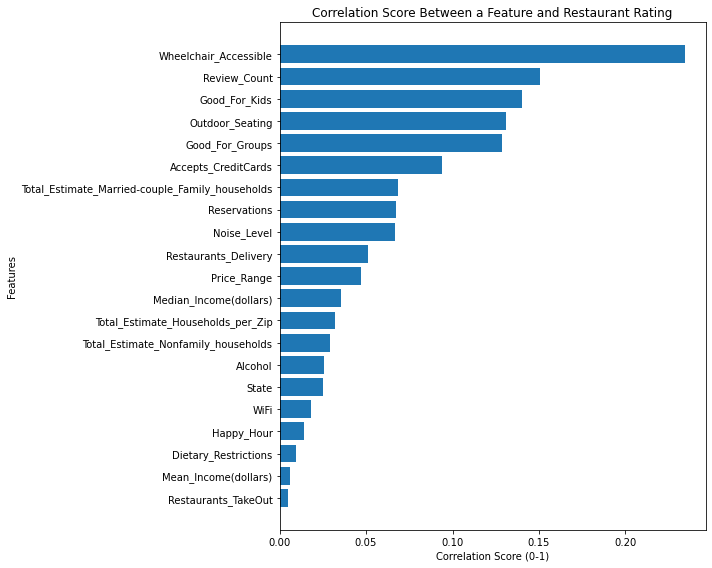

In [87]:

plt.rcParams["figure.figsize"] = (10,8)
plt.barh(corr_df["Feature"], corr_df["Correlation_Score"])
plt.title("Correlation Score Between a Feature and Restaurant Rating")
plt.xlabel("Correlation Score (0-1)")
plt.ylabel("Features")
plt.tight_layout()
plt.gca().invert_yaxis()

# Feature Importance from the Balanced Random Forest

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sqlalchemy import create_engine
# from config import db_password
from sqlalchemy import inspect
import matplotlib.pyplot as plt
import pandas as pd

business_df = pd.read_csv("../Data/business_census_merged_dataset.csv")


# Categorizing restaurants based on stars ratings
business_df["Category"] = pd.cut(business_df["Stars_Rating"],bins=[0.9,3.5,5],
                                 labels=["Lower Performance", "Higher Performance"])


def changeStatus(status):
    if status == "Lower Performance":
        return 0
    else:
        return 1
    
business_df['Category_Encoded'] = business_df["Category"].apply(changeStatus)
business_df["Category_Encoded"] = pd.to_numeric(business_df["Category_Encoded"])

# Transform Previous State column
def changeStatus(status):
    if status == 'AZ':
        return 1
    elif status == 'CA':
        return 2
    elif status == 'DE':
        return 3
    elif status == 'FL':
        return 4
    elif status == 'ID':
        return 5
    elif status == 'IL':
        return 6
    elif status == 'IN':
        return 7
    elif status == 'LA':
        return 8
    elif status == 'NJ':
        return 9
    elif status == 'NV':
        return 10
    elif status == 'PA':
        return 11
    else:
        return 12
# Along with replace() and map(), encode the state column into numbers.
business_df["State"] = business_df["State"].apply(changeStatus)

In [69]:
X = business_df[['State', 'Review_Count', 'Restaurants_Delivery', 'Outdoor_Seating',
       'Accepts_CreditCards', 'Price_Range', 'Alcohol', 'Good_For_Kids',
       'Reservations', 'Restaurants_TakeOut', 'WiFi', 'Good_For_Groups',
       'Wheelchair_Accessible', 'Happy_Hour', 'Noise_Level',
       'Dietary_Restrictions',
                'Total_Estimate_Married-couple_Family_households',
                'Total_Estimate_Nonfamily_households',
                'Median_Income(dollars)', 'Mean_Income(dollars)',
                 'Total_Estimate_Households_per_Zip']]

In [70]:
# Define the target
y = business_df["Category_Encoded"]

In [71]:
# Split the model into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y, 
                                                   random_state=1, 
                                                    stratify=y)

In [72]:
# Resample the training data with the BalancedRandomForestClassifier

from imblearn.ensemble import BalancedRandomForestClassifier

model = BalancedRandomForestClassifier(n_estimators=100, random_state=1)

model.fit(X_train, y_train)  

BalancedRandomForestClassifier(random_state=1)

In [73]:
# List the features sorted in descending order by feature importance
feature_importance = sorted(zip(model.feature_importances_, X.columns), reverse=True)

feature_importance
for i in feature_importance:
    print('{} : ({})'.format(i[1], i[0]))

Review_Count : (0.22070870086727332)
Total_Estimate_Married-couple_Family_households : (0.08566440495459011)
Median_Income(dollars) : (0.08519923269798375)
Total_Estimate_Nonfamily_households : (0.08437782763264393)
Mean_Income(dollars) : (0.08424842054354315)
Total_Estimate_Households_per_Zip : (0.0813818764324349)
State : (0.04921492736748888)
Noise_Level : (0.043096781348330164)
Wheelchair_Accessible : (0.037454728391432254)
Price_Range : (0.03256885920079341)
Restaurants_Delivery : (0.027832375631127892)
WiFi : (0.027103217328927474)
Reservations : (0.026059532333836212)
Outdoor_Seating : (0.023972754947235095)
Happy_Hour : (0.022582172271741634)
Good_For_Kids : (0.019555504455909114)
Good_For_Groups : (0.01915201996785231)
Accepts_CreditCards : (0.012563140441101907)
Alcohol : (0.008711602135313775)
Restaurants_TakeOut : (0.008374484499247013)
Dietary_Restrictions : (0.00017743655119384895)


In [3]:
feature = ['Review_Count',
 'Total_Estimate_Married-couple_Family_households', 
 'Median_Income(dollars)',
 'Total_Estimate_Nonfamily_households',
  'Mean_Income(dollars)', 
 'Total_Estimate_Households_per_Zip',
 'State',
 'Noise_Level',
 'Wheelchair_Accessible',
 'Price_Range',
 'WiFi',
 'Restaurants_Delivery',
 'Reservations',
 'Outdoor_Seating',
 'Happy_Hour',
 'Good_For_Kids',
 'Good_For_Groups',
 'Accepts_CreditCards',
 'Alcohol',
 'Restaurants_TakeOut',
 'Dietary_Restrictions']

In [2]:
score = [0.22070870086727332,
0.08566440495459011,
0.08519923269798375,
0.08437782763264393,
0.08424842054354315,
0.0813818764324349,
0.04921492736748888,
0.043096781348330164,
0.037454728391432254,
0.03256885920079341,
0.027832375631127892,
0.027103217328927474,
0.026059532333836212,
0.023972754947235095,
0.022582172271741634,
0.019555504455909114,
0.01915201996785231,
0.012563140441101907,
.008711602135313775,
0.008374484499247013,
0.00017743655119384895]

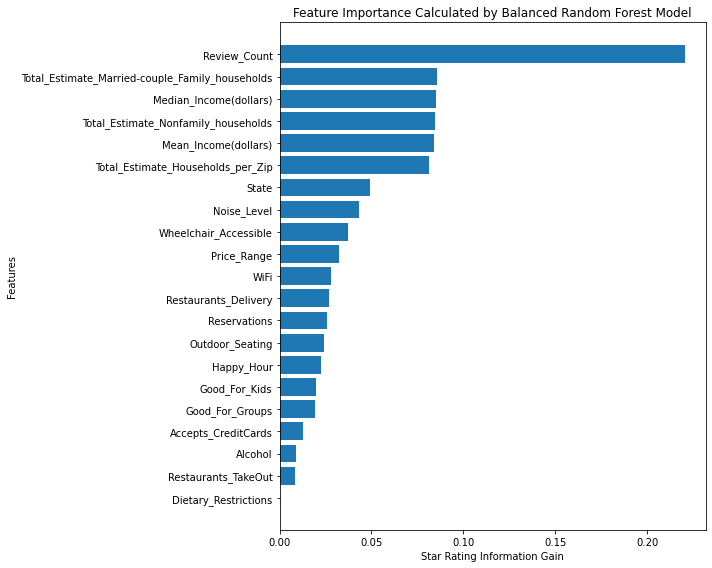

In [91]:
plt.rcParams["figure.figsize"] = (10,8)
plt.barh(feature, score)
plt.title("Feature Importance Calculated by Balanced Random Forest Model")
plt.xlabel("Star Rating Information Gain")
plt.ylabel("Features")
plt.tight_layout()
plt.gca().invert_yaxis()